# Project Prototype 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
Mortality = pd.read_csv("Mortality Both Sexes.csv").drop(columns=["Unnamed: 0", "ParentLocation", "DateModified"])
MortalityF = pd.read_csv("Mortality Female.csv").drop(columns=["Unnamed: 0", "ParentLocation", "DateModified"])
MortalityM = pd.read_csv("Mortality Male.csv").drop(columns=["Unnamed: 0", "ParentLocation", "DateModified"])
Alcohol = pd.read_csv("WHOAlcoholTotalPerCapita_2021-09-20v2.csv").drop(columns=["Alcohol total per capita (15+) consumption in liters (low estimation)", 
                                                                                 "Alcohol total per capita (15+) consumption in liters (high estimation)", 
                                                                                 "Alcohol total per capita (15+) consumption in liters (string)",
                                                                                "Country Code", "WHO Region", "WHO Region Code"])

Alcohol = Alcohol[((Alcohol["Year"] != 2017) & (Alcohol["Year"] != 2018) & (Alcohol["Year"] != 2019))]

### Question 1


In [2]:
Alcohol.head()

Country  Year         Sex  \
1692      Kuwait  2016  Both sexes   
1693      Kuwait  2016      Female   
1694      Kuwait  2016        Male   
1695  Mauritania  2016  Both sexes   
1696  Mauritania  2016      Female   

      Alcohol total per capita (15+) consumption in liters (numeric)  
1692                                                0.0               
1693                                                0.0               
1694                                                0.0               
1695                                                0.0               
1696                                                0.0

In [3]:
Mortality_both = pd.concat([Mortality, MortalityM, MortalityF])
Mortality_both.head()

Location  Period         Sex  Adult mortality rate
0  Barbados    2016  Both sexes                 100.4
1    Serbia    2016  Both sexes                 102.5
2    Turkey    2016  Both sexes                 104.0
3  Slovakia    2016  Both sexes                 104.1
4     Samoa    2016  Both sexes                 110.4

### Question 2

In [4]:
mergedDF = Alcohol.merge(Mortality_both, left_on="Country", right_on="Location", how="inner")

mergedDF = mergedDF[mergedDF["Year"] == mergedDF["Period"]]
mergedDF = mergedDF[mergedDF["Sex_x"] == mergedDF["Sex_y"]]
mergedDF = mergedDF[mergedDF["Country"] == mergedDF["Location"]]

mergedDF = mergedDF.drop(columns= ["Location", "Period", "Sex_y"])

mergedDF.head(15)

Country  Year       Sex_x  \
0    Kuwait  2016  Both sexes   
85   Kuwait  2016      Female   
119  Kuwait  2016        Male   
154  Kuwait  2015  Both sexes   
239  Kuwait  2015      Female   
273  Kuwait  2015        Male   
308  Kuwait  2014  Both sexes   
393  Kuwait  2014      Female   
427  Kuwait  2014        Male   
462  Kuwait  2013  Both sexes   
547  Kuwait  2013      Female   
581  Kuwait  2013        Male   
616  Kuwait  2012  Both sexes   
701  Kuwait  2012      Female   
735  Kuwait  2012        Male   

     Alcohol total per capita (15+) consumption in liters (numeric)  \
0                                                  0.0                
85                                                 0.0                
119                                                0.0                
154                                                0.0                
239                                                0.0                
273                                                0.0                
308                                                0.0                
393                                                0.0                
427                                                0.0                
462                                                0.0                
547                                                0.0                
581                                                0.0                
616                                                0.0                
701                                                0.0                
735                                                0.0                

     Adult mortality rate  
0                   79.22  
85                  57.32  
119                 93.33  
154                 80.47  
239                 58.32  
273                 94.63  
308                 81.05  
393                 59.07  
427                 94.86  
462                 82.09  
547                 59.94  
581                 95.81  
616                 82.71  
701                 60.66  
735                 96.18

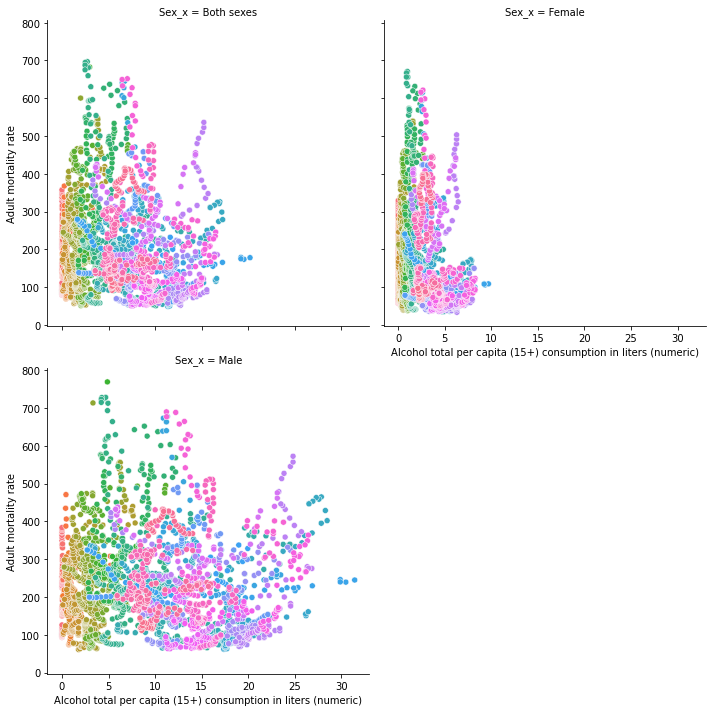

In [5]:
sns.relplot(data=mergedDF, x="Alcohol total per capita (15+) consumption in liters (numeric)", y="Adult mortality rate", col="Sex_x", hue="Country", kind="scatter", col_wrap=2, legend=False)

Make a linear regression using pipeline?

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

sex_choice = mergedDF[mergedDF["Sex_x"] == "Both sexes"]

"""data = PolynomialFeatures(3).fit_transform(np.append(OneHotEncoder().fit_transform(mergedDF[["Sex_x"]].values).toarray(), 
                 mergedDF[["Alcohol total per capita (15+) consumption in liters (numeric)"]], axis=1))
"""
data = PolynomialFeatures(2).fit_transform(sex_choice[["Alcohol total per capita (15+) consumption in liters (numeric)"]].values)

target = sex_choice[["Adult mortality rate"]].values

mortality_linear = LinearRegression()
mortality_linear.fit(X=data, y=target)

sex_choice["Mortality_prediction"] = mortality_linear.predict(data)

q1_mse = mean_squared_error(sex_choice["Adult mortality rate"].values, sex_choice["Mortality_prediction"].values) # float: MSE
q1_r2 = r2_score(sex_choice["Adult mortality rate"].values, sex_choice["Mortality_prediction"].values) # float: R^2 score

# Leave this line here to print the result
print("MSE:", q1_mse, "r^2:", q1_r2)
sex_choice.tail(25)

MSE: 12494.131136666525 r^2: 0.03842986717869312


/var/folders/93/yg9zfffs2xbgwx67k31stg_h0000gn/T/ipykernel_26995/4267034528.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sex_choice["Mortality_prediction"] = mortality_linear.predict(data)


Country  Year       Sex_x  \
464925  Nigeria  2007  Both sexes   
465079  Nigeria  2006  Both sexes   
465233  Nigeria  2005  Both sexes   
465387  Nigeria  2004  Both sexes   
465541  Nigeria  2003  Both sexes   
465695  Nigeria  2002  Both sexes   
465849  Nigeria  2001  Both sexes   
466003  Nigeria  2000  Both sexes   
466089     Cuba  2016  Both sexes   
466243     Cuba  2015  Both sexes   
466397     Cuba  2014  Both sexes   
466551     Cuba  2013  Both sexes   
466705     Cuba  2012  Both sexes   
466859     Cuba  2011  Both sexes   
467013     Cuba  2010  Both sexes   
467167     Cuba  2009  Both sexes   
467321     Cuba  2008  Both sexes   
467475     Cuba  2007  Both sexes   
467629     Cuba  2006  Both sexes   
467783     Cuba  2005  Both sexes   
467937     Cuba  2004  Both sexes   
468091     Cuba  2003  Both sexes   
468245     Cuba  2002  Both sexes   
468399     Cuba  2001  Both sexes   
468553     Cuba  2000  Both sexes   

        Alcohol total per capita (15+) consumption in liters (numeric)  \
464925                                               6.50                
465079                                               6.68                
465233                                               6.78                
465387                                               6.82                
465541                                               6.76                
465695                                               6.72                
465849                                               6.79                
466003                                               6.79                
466089                                               6.07                
466243                                               5.97                
466397                                               5.83                
466551                                               5.62                
466705                                               5.47                
466859                                               5.38                
467013                                               5.28                
467167                                               5.31                
467321                                               5.30                
467475                                               5.35                
467629                                               5.42                
467783                                               5.55                
467937                                               5.66                
468091                                               5.52                
468245                                               5.38                
468399                                               5.21                
468553                                               5.21                

        Adult mortality rate  Mortality_prediction  
464925                387.60            196.573209  
465079                394.90            195.732776  
465233                402.30            195.255770  
465387                410.90            195.062949  
465541                415.10            195.351748  
465695                413.90            195.542839  
465849                411.50            195.207673  
466003                407.50            195.207673  
466089                 92.46            198.486319  
466243                 94.34            198.912115  
466397                 95.34            199.496112  
466551                 95.67            200.345601  
466705                 95.85            200.932905  
466859                 91.70            201.277498  
467013                 97.35            201.653526  
467167                 98.78            201.541475  
467321                100.00            201.578898  
467475                101.60            201.391064  
467629                102.70            201.125066  
467783                109.70            200.621696  
467937 

There is very low correlation between "Alcohol total per capita (15+) consumption in liters (numeric)" and adult mortality rate among all 3 gender categories.

What if we performed polynomial linear regression for all variables?

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures

data = PolynomialFeatures().fit_transform(np.append(OneHotEncoder().fit_transform(mergedDF[["Country", "Sex_x"]].values).toarray(), 
                 mergedDF[["Alcohol total per capita (15+) consumption in liters (numeric)", "Year"]], axis=1))

target = mergedDF[["Adult mortality rate"]].values

mortality_linear = LinearRegression()
mortality_linear.fit(X=data, y=target)

mergedDF["Mortality_prediction"] = mortality_linear.predict(data)

q1_mse = mean_squared_error(mergedDF["Adult mortality rate"].values, mergedDF["Mortality_prediction"].values) # float: MSE
q1_r2 = r2_score(mergedDF["Adult mortality rate"].values, mergedDF["Mortality_prediction"].values) # float: R^2 score

# Leave this line here to print the result
print("MSE:", q1_mse, "r^2:", q1_r2)
mergedDF.tail(25)

MSE: 194.45879021369092 r^2: 0.9862876641664191


Country  Year       Sex_x  \
467389    Cuba  2008        Male   
467458    Cuba  2007      Female   
467475    Cuba  2007  Both sexes   
467543    Cuba  2007        Male   
467612    Cuba  2006      Female   
467629    Cuba  2006  Both sexes   
467697    Cuba  2006        Male   
467766    Cuba  2005      Female   
467783    Cuba  2005  Both sexes   
467851    Cuba  2005        Male   
467920    Cuba  2004      Female   
467937    Cuba  2004  Both sexes   
468005    Cuba  2004        Male   
468074    Cuba  2003      Female   
468091    Cuba  2003  Both sexes   
468159    Cuba  2003        Male   
468228    Cuba  2002      Female   
468245    Cuba  2002  Both sexes   
468313    Cuba  2002        Male   
468382    Cuba  2001      Female   
468399    Cuba  2001  Both sexes   
468467    Cuba  2001        Male   
468536    Cuba  2000      Female   
468553    Cuba  2000  Both sexes   
468621    Cuba  2000        Male   

        Alcohol total per capita (15+) consumption in liters (numeric)  \
467389                                               8.46                
467458                                               2.24                
467475                                               5.35                
467543                                               8.54                
467612                                               2.25                
467629                                               5.42                
467697                                               8.67                
467766                                               2.28                
467783                                               5.55                
467851                                               8.90                
467920                                               2.31                
467937                                               5.66                
468005                                               9.09                
468074                                               2.24                
468091                                               5.52                
468159                                               8.88                
468228                                               2.18                
468245                                               5.38                
468313                                               8.65                
468382                                               2.11                
468399                                               5.21                
468467                                               8.38                
468536                                               2.11                
468553                                               5.21                
468621                                               8.38                

        Adult mortality rate  Mortality_prediction  
467389                118.80            121.720788  
467458                 80.23             83.029811  
467475                101.60            104.345528  
467543                122.40            124.858415  
467612                 81.00             84.821335  
467629                102.70            107.048676  
467697                123.70            128.513412  
467766                 87.54             86.710741  
467783                109.70            110.341758  
467851                131.10            133.286630  
467920                 88.16             88.524920  
467937                109.30            113.357515  
468005                129.80            137.548048  
468074                 90.61             89.358246  
468091                111.60            113.525546  
468159                131.80            136.991145  
468228                 89.93             90.187857  
468245                111.90            113.583048  
468313                133.10            136.067019  
468382                 96.85             90.831409  
468399                119.50    